<a href="https://colab.research.google.com/github/ngthvan02/AI/blob/main/BT_Fuzzy_Nguy%E1%BB%85n%20Thanh%20V%C4%83n_20146181.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import numpy as np
import skfuzzy as fuzz
import matplotlib as plt
x=np.arange(50,81,1)
slow=fuzz.trimf(x,[50,50,60])
plt.figure()
plt.plot(x,slow,'r',linewidth=15,label='slow')
plt.plot()


AttributeError: ignored

10.356410256410255


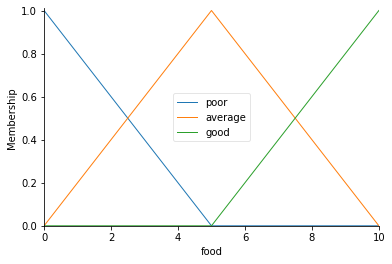

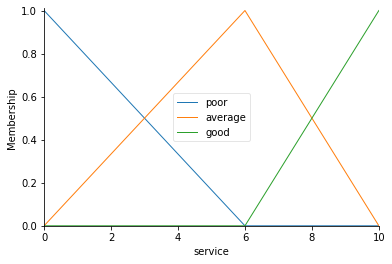

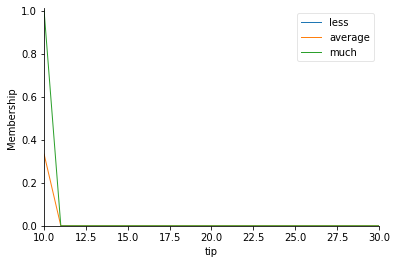

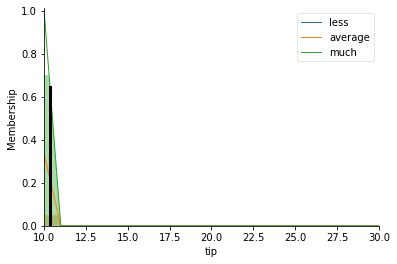

In [52]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']= fuzz.trimf(food.universe, [0,0,5])
food['average'] = fuzz.trimf(food.universe, [0,5,10])
food['good'] = fuzz.trimf(food.universe, [5,10,10])
food.view()
service['poor'] = fuzz.trimf(service.universe, [0,0,6])
service['average'] = fuzz.trimf(service.universe, [0,6,10])
service['good'] = fuzz.trimf(service.universe, [6,10,10])
service.view()
tip['less'] = fuzz.trimf(tip.universe, [0,0,8])
tip['average'] = fuzz.trimf(tip.universe, [0,8,11])
tip['much'] = fuzz.trimf(tip.universe, [8,10,11])
tip.view()
rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['average'])
rule4 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['average'])
rule6 = ctrl.Rule(food['average'] & service['good'], tip['much'])
rule7 = ctrl.Rule(food['good'] & service['poor'], tip['less'])
rule8 = ctrl.Rule(food['good'] & service['average'], tip['average'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)







42.325853873499


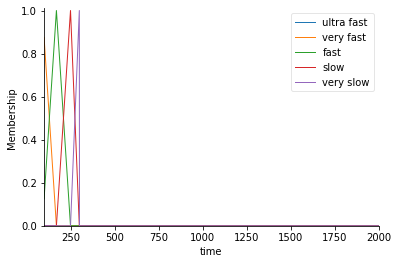

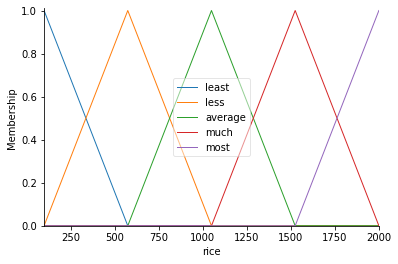

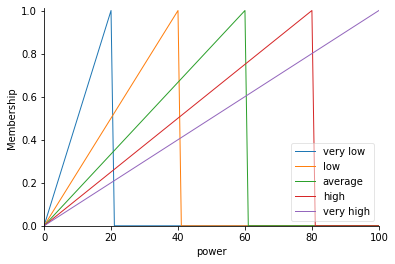

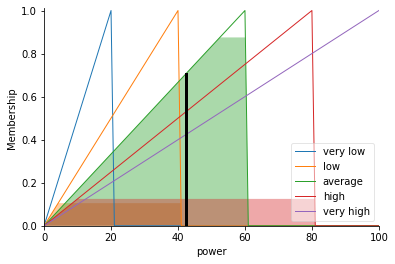

In [55]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt 

time = ctrl.Antecedent(np.arange(100,2001,1), 'time')
rice = ctrl.Antecedent(np.arange(100,2001,1), 'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')

#ham lien thuoc
time['ultra fast'] = fuzz.trimf(time.universe, [10,10,90]) 
time['very fast'] = fuzz.trimf(time.universe, [10,90,170])
time['fast'] = fuzz.trimf(time.universe, [90,170,250])
time['slow'] = fuzz.trimf(time.universe, [170,250,300])
time['very slow'] = fuzz.trimf(time.universe, [250,300,300])
time.view()
rice['least'] = fuzz.trimf(rice.universe, [100,100,575])
rice['less'] = fuzz.trimf(rice.universe, [100,575,1050])
rice['average'] = fuzz.trimf(rice.universe, [575,1050,1525])
rice['much'] = fuzz.trimf(rice.universe, [1050,1525,2000])
rice['most'] = fuzz.trimf(rice.universe, [1525,2000,2000])
rice.view()
power['very low'] = fuzz.trimf(power.universe, [0,20,20])
power['low'] = fuzz.trimf(power.universe, [0,40,40])
power['average'] = fuzz.trimf(power.universe, [0,60,60])
power['high'] = fuzz.trimf(power.universe, [0,80,80])
power['very high'] = fuzz.trimf(power.universe, [0,100,100])
power.view()
#make rule
rule1 = ctrl.Rule(time['ultra fast'] & rice['least'], power['very low'])
rule2 = ctrl.Rule(time['ultra fast'] & rice['less'], power['very low'])
rule3 = ctrl.Rule(time['ultra fast'] & rice['average'], power['low'])
rule4 = ctrl.Rule(time['ultra fast'] & rice['much'], power['low'])
rule5 = ctrl.Rule(time['ultra fast'] & rice['most'], power['average'])

rule6 = ctrl.Rule(time['very fast'] & rice['least'], power['low'])
rule7 = ctrl.Rule(time['very fast'] & rice['less'], power['low'])
rule8 = ctrl.Rule(time['very fast'] & rice['average'], power['average'])
rule9 = ctrl.Rule(time['very fast'] & rice['much'], power['average'])
rule10 = ctrl.Rule(time['very fast'] & rice['most'], power['high'])

rule11 = ctrl.Rule(time['fast'] & rice['least'], power['average'])
rule12 = ctrl.Rule(time['fast'] & rice['less'], power['average'])
rule13 = ctrl.Rule(time['fast'] & rice['average'], power['high'])
rule14 = ctrl.Rule(time['fast'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['fast'] & rice['most'], power['very high'])

rule16 = ctrl.Rule(time['slow'] & rice['least'], power['high'])
rule17 = ctrl.Rule(time['slow'] & rice['less'], power['high'])
rule18 = ctrl.Rule(time['slow'] & rice['average'], power['very high'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['very high'])
rule20 = ctrl.Rule(time['slow'] & rice['most'], power['very high'])

rule21 = ctrl.Rule(time['very slow'] & rice['least'], power['high'])
rule22 = ctrl.Rule(time['very slow'] & rice['less'], power['high'])
rule23 = ctrl.Rule(time['very slow'] & rice['average'], power['very high'])
rule24 = ctrl.Rule(time['very slow'] & rice['much'], power['very high'])
rule25 = ctrl.Rule(time['very slow'] & rice['most'], power['very high'])

power_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20,rule21, rule22, rule23, rule24, rule25]) 
powering = ctrl.ControlSystemSimulation(power_ctrl) 

powering.input['time'] = 100
powering.input['rice'] = 1000
powering.compute()
print(powering.output['power'])
power.view(sim = powering)